# <center>Image data and Tensorflow basic</center>

# Table of Contents
- [1. Read image to memory](#s1)
    - [1.1 Image.open](#s1.1)
    - [1.2 plt.imread & plt.imshow](#s1.2)
    - [1.3 Images shape](#s1.3)
- <a href='#s2'>2. Grayscale</a>
    - <a href='#s2.1'>2.1 Inner product</a>
    - <a href='#s2.2'>2.2 Convert all the rgb to gray</a>
    - <a href='#s2.3'>2.3 Load data</a>
- <a href='#s3'>3. Tensorflow Basic</a>
    - <a href='#s3.1'>3.1 Create a graph</a>
    - <a href='#s3.2'>3.2 Run a session</a>
    - <a href='#s3.3'>3.3 Interactive session</a>
    - <a href='#s3.4'>3.4 Variables</a>
    - <a href='#s3.5'>3.5 Placeholder</a>
     <a href='#s3.6'> </a>

<a id='s1'></a>
# 1. Read image to memory

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os,sys
from PIL import Image

Using CelebFace dataset as example, take a peek at some of the data

<a id='s1.1'></a>
## 1.1 Image.open

In [2]:
path = '/home/senbo/Github/img_align_celeba/';
image = '000002.jpg';
filename = path + image;
print os.path.exists(filename);
peek_img = Image.open(filename);
print(os.stat(filename));
print(peek_img.size);
peek_img.show(); # open image by system image viewer

True
posix.stat_result(st_mode=33204, st_ino=2624743, st_dev=2049, st_nlink=1, st_uid=1000, st_gid=1000, st_size=7448, st_atime=1473505399, st_mtime=1443430188, st_ctime=1473413539)
(178, 218)


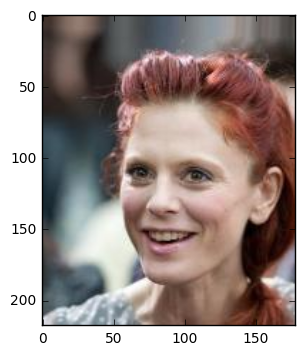

In [3]:
imgplot = plt.imshow(peek_img);

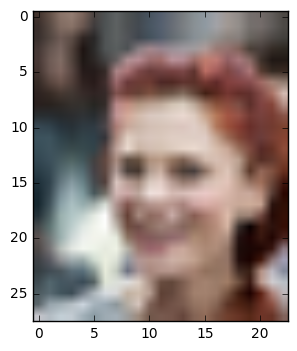

In [4]:
peek_img.thumbnail((28,28), Image.ANTIALIAS); #resizes image
plt.imshow(peek_img);

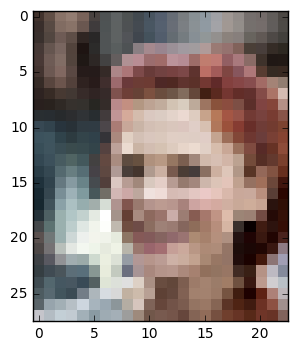

In [5]:
imgplot = plt.imshow(peek_img, interpolation="nearest");

<a id='s1.2'></a>
## 1.2 plt.imread & plt.imshow()

In [6]:
image = '000001.jpg';
filename = path + image; 
data = plt.imread(filename);
print (data);

[[[253 231 194]
  [253 231 194]
  [253 231 194]
  ..., 
  [246 228 216]
  [255 237 223]
  [254 238 222]]

 [[253 231 194]
  [253 231 194]
  [253 231 194]
  ..., 
  [248 230 218]
  [255 237 223]
  [254 238 222]]

 [[253 231 194]
  [253 231 194]
  [253 231 194]
  ..., 
  [250 232 220]
  [255 238 224]
  [255 239 223]]

 ..., 
 [[140  74  26]
  [115  49   1]
  [146  78  33]
  ..., 
  [122  55  28]
  [123  56  30]
  [122  56  30]]

 [[130  62  15]
  [138  70  23]
  [166  98  53]
  ..., 
  [118  49  20]
  [120  50  24]
  [118  51  24]]

 [[168 100  53]
  [204 136  89]
  [245 177 132]
  ..., 
  [118  49  20]
  [120  50  24]
  [120  50  24]]]


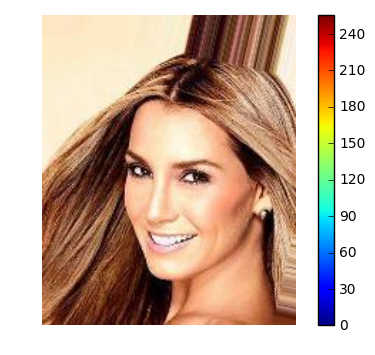

In [7]:
img = plt.imshow(data);
plt.axis('off');             # remove axis
plt.colorbar();

<a id='s1.3'></a>
## 1.3 Images' shape

In [8]:
data1 = plt.imread(filename);
print(data1.shape);

(218, 178, 3)


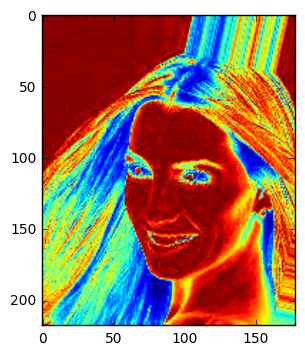

In [9]:
lum_img = data[:,:,0];
plt.imshow(lum_img);

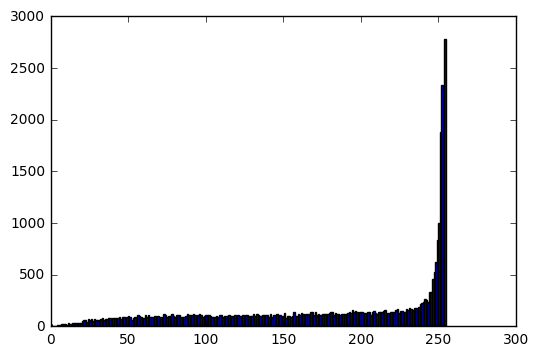

In [10]:
plt.hist(lum_img.ravel(), bins=256);

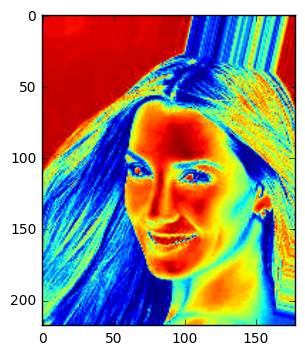

In [11]:
lum_img = data[:,:,1];
plt.imshow(lum_img);

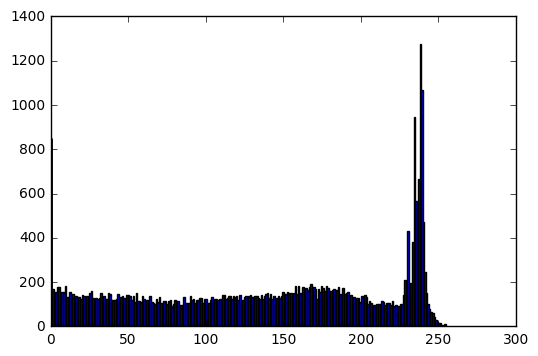

In [12]:
plt.hist(lum_img.ravel(), 256);

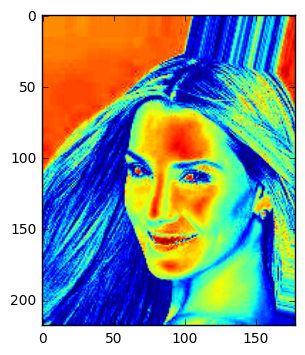

In [13]:
plt.imshow(data[:,:,2]);

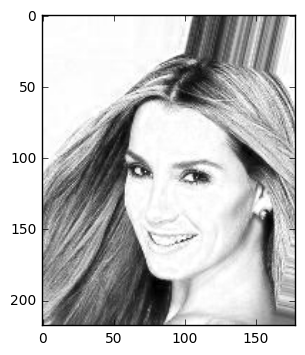

In [14]:
img = plt.imshow(data[:,:,0]);
img.set_cmap('gray');

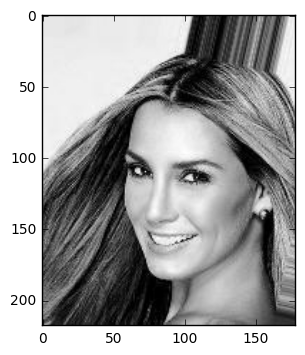

In [15]:
plt.imshow(data[:,:,1], cmap='gray');

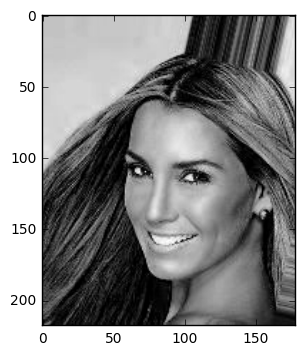

In [16]:
plt.imshow(data[:,:,2], cmap='gray');

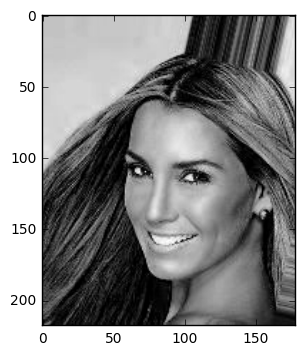

In [17]:
plt.imshow(data[:,:,0], cmap='gray');
plt.imshow(data[:,:,1], cmap='gray');
plt.imshow(data[:,:,2], cmap='gray');

<a id='s2'></a>
# 2. [Grayscale](en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale)

- uising PIL(python imaging library) convert an RGB image into grayscale 

(178, 218)


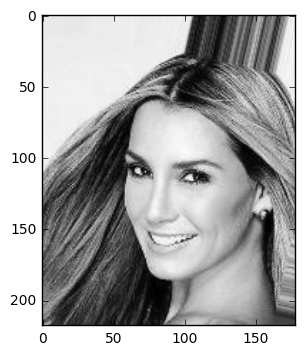

In [18]:
img_grey = Image.open(filename).convert('LA');
width, height = img_grey.size;
print img_grey.size;
plt.imshow(img_grey);
img_grey.save('/home/senbo/Downloads/grey.png');

grayscale convert formula:
$$Y' = 0.299 R + 0.587 G + 0.114 B$$

- 3-D matrix just like 2-D matrix *3

In [19]:
a = np.array([[[1,2,3],[2,3,4]],[[4,5,6],[6,7,8]],[[8,9,10],[10,11,12]]], np.int32);
print(a);
print('shape: ',a.shape);

[[[ 1  2  3]
  [ 2  3  4]]

 [[ 4  5  6]
  [ 6  7  8]]

 [[ 8  9 10]
  [10 11 12]]]
('shape: ', (3, 2, 3))


In [20]:
np.dot([1,2], [1,1]);

<a id='s2.1'></a>
## 2.1 Inner product
3-D matrix dot product example:
- axis-0
$$
\left(\begin{array}{cc}
1&2&3\\
2&3&4
\end{array}\right)
\left(\begin{array}{cc}
1\\
0\\
0
\end{array}\right)
$$
- axis-1
$$
\left(\begin{array}{cc}
4&5&6\\
6&7&8
\end{array}\right)
\left(\begin{array}{cc}
1\\
0\\
0
\end{array}\right)
$$
- axis-2
$$
\left(\begin{array}{cc}
8&9&10\\
10&11&12
\end{array}\right)
\left(\begin{array}{cc}
1\\
0\\
0
\end{array}\right)
$$

In [21]:
np.dot(a, [1,0,0]);

In [22]:
print (a[...,:2]);

[[[ 1  2]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]


- $\sum_{axis=i}M$ the $i_{th}$ demonsion will be 1
In this exampel, the sum matrix's shape is (1,2,3), which omit the $1_st$ parameter 1

In [23]:
axis1_sum = np.sum(a, axis=0);
print(axis1_sum);
print(axis1_sum.shape);

[[13 16 19]
 [18 21 24]]
(2, 3)


In [24]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114]);

In [25]:
data = plt.imread(filename);
print (data.shape);
grey = rgb2gray(data);
print (grey.shape);

(218, 178, 3)
(218, 178)


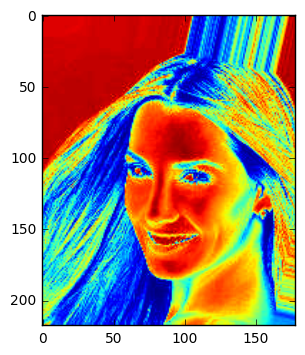

In [26]:
plt.imshow(grey);

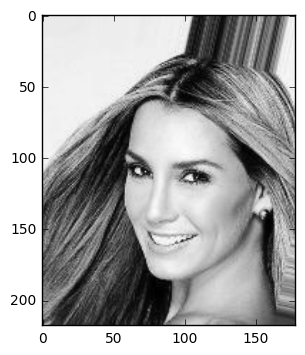

In [27]:
plt.imshow(grey, cmap='gray');

<a id='s2.2'></a>
## 2.2 Convert all the rgb to gray

In [28]:
def rgb2grey(rgb_path, save_path, force = False):
    """convert rgb to grey image"""
    img = Image.open(rgb_path).convert('L');
    if force or not os.path.exists(save_path):
        img.save(save_path);  
    elif os.path.exists(save_path):
            pass;
    else:
        raise Exception(
            'Failed to save ' + save_path + '.');
    return rgb_path;

In [29]:
savename = '/home/senbo/Downloads/grey.jpg';
img_g = rgb2grey(filename, savename)

- os.path.join() : connect string

In [30]:
folder = 'usr/';
path = '1.jpg';
path_join = os.path.join(folder, path);
print(path_join);

usr/1.jpg


- os.listdir(): display files' name in folder/dir as a list

In [31]:
list_dir = os.listdir('/home/senbo/Downloads');
print(list_dir);
print (len(list_dir));

['grey.png', 'luacrypto-0.3.2-1.src.rock', 'Gray_face', 'lbase64-20120807-3.src.rock', 'lzmq-0.4.3-1.src.rock', 'sublime-text_build-3114_amd64.deb', 'tensorflow-0.10.0-cp27-none-linux_x86_64.whl', 'grey.jpg', 'lbase64-20120820-1.src.rock', 'uuid-0.2-1.src.rock']
10


In [32]:
def save2gray(rgb_folder, save_folder, min_num_images):
    """Load the data from a folder"""
    img_files = os.listdir(rgb_folder);  #get a list containing the names of the entries in the dir
    #dataset = np.ndarray(shape=(len(img_files), img_height, image_width), dtype=np.float32)
    print(rgb_folder)
    for image_index, image in enumerate(img_files):
        rgb_image = os.path.join(rgb_folder, image);
        grey_image = os.path.join(save_folder, image);
        if os.path.exists(grey_image):
            pass;
        else:
            try:
                rgb2grey(rgb_image, grey_image);
            except IOError as e:
                print('Could not convert: ', rgb_image, ':', e);
            
    num_images = image_index + 1;
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' % (num_images, min_num_images));
    return rgb_folder;

In [33]:
save_folder = '/home/senbo/Downloads/Gray_face/';
rgb_folder = '/home/senbo/Github/img_align_celeba/';
num_img = 202599;
rgb_folder = save2gray(rgb_folder, save_folder, num_img);

/home/senbo/Github/img_align_celeba/


<a id='s2.3'></a>
## 2.3 Load data

In [34]:
img_height = 218;
img_width = 178;
img_channel = 3;

In [35]:
dataset = np.ndarray(shape=(2, img_height, img_width, img_channel), dtype=np.float32);
dataset[0,:,:] = plt.imread('/home/senbo/Github/img_align_celeba/000001.jpg');
dataset[1,:,:] = Image.open('/home/senbo/Github/img_align_celeba/000002.jpg');
print(dataset);

[[[[ 253.  231.  194.]
   [ 253.  231.  194.]
   [ 253.  231.  194.]
   ..., 
   [ 246.  228.  216.]
   [ 255.  237.  223.]
   [ 254.  238.  222.]]

  [[ 253.  231.  194.]
   [ 253.  231.  194.]
   [ 253.  231.  194.]
   ..., 
   [ 248.  230.  218.]
   [ 255.  237.  223.]
   [ 254.  238.  222.]]

  [[ 253.  231.  194.]
   [ 253.  231.  194.]
   [ 253.  231.  194.]
   ..., 
   [ 250.  232.  220.]
   [ 255.  238.  224.]
   [ 255.  239.  223.]]

  ..., 
  [[ 140.   74.   26.]
   [ 115.   49.    1.]
   [ 146.   78.   33.]
   ..., 
   [ 122.   55.   28.]
   [ 123.   56.   30.]
   [ 122.   56.   30.]]

  [[ 130.   62.   15.]
   [ 138.   70.   23.]
   [ 166.   98.   53.]
   ..., 
   [ 118.   49.   20.]
   [ 120.   50.   24.]
   [ 118.   51.   24.]]

  [[ 168.  100.   53.]
   [ 204.  136.   89.]
   [ 245.  177.  132.]
   ..., 
   [ 118.   49.   20.]
   [ 120.   50.   24.]
   [ 120.   50.   24.]]]


 [[[  67.   52.   45.]
   [  65.   50.   43.]
   [  65.   50.   43.]
   ..., 
   [  76.   73.   

[[[  67.   52.   45.]
  [  65.   50.   43.]
  [  65.   50.   43.]
  ..., 
  [  76.   73.   68.]
  [  82.   79.   74.]
  [  84.   81.   74.]]

 [[  67.   52.   45.]
  [  65.   50.   43.]
  [  65.   50.   43.]
  ..., 
  [  76.   73.   68.]
  [  82.   79.   74.]
  [  84.   81.   74.]]

 [[  67.   52.   47.]
  [  65.   50.   45.]
  [  65.   50.   43.]
  ..., 
  [  76.   73.   68.]
  [  82.   79.   74.]
  [  84.   81.   74.]]

 ..., 
 [[ 211.  211.  221.]
  [ 221.  221.  231.]
  [ 221.  221.  229.]
  ..., 
  [ 123.   92.   87.]
  [ 139.  116.  110.]
  [ 146.  129.  122.]]

 [[ 227.  225.  236.]
  [ 222.  220.  231.]
  [ 215.  214.  222.]
  ..., 
  [ 138.  103.   99.]
  [ 142.  117.  112.]
  [ 138.  119.  112.]]

 [[ 227.  225.  236.]
  [ 222.  220.  231.]
  [ 215.  214.  222.]
  ..., 
  [ 141.  106.  100.]
  [ 144.  116.  112.]
  [ 139.  119.  112.]]]


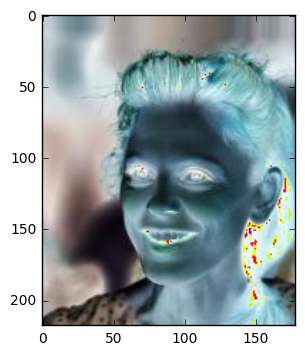

In [36]:
print(dataset[1,:,:]);
plt.imshow(dataset[1,:,:]);

[[[ 67  52  45]
  [ 65  50  43]
  [ 65  50  43]
  ..., 
  [ 76  73  68]
  [ 82  79  74]
  [ 84  81  74]]

 [[ 67  52  45]
  [ 65  50  43]
  [ 65  50  43]
  ..., 
  [ 76  73  68]
  [ 82  79  74]
  [ 84  81  74]]

 [[ 67  52  47]
  [ 65  50  45]
  [ 65  50  43]
  ..., 
  [ 76  73  68]
  [ 82  79  74]
  [ 84  81  74]]

 ..., 
 [[211 211 221]
  [221 221 231]
  [221 221 229]
  ..., 
  [123  92  87]
  [139 116 110]
  [146 129 122]]

 [[227 225 236]
  [222 220 231]
  [215 214 222]
  ..., 
  [138 103  99]
  [142 117 112]
  [138 119 112]]

 [[227 225 236]
  [222 220 231]
  [215 214 222]
  ..., 
  [141 106 100]
  [144 116 112]
  [139 119 112]]]


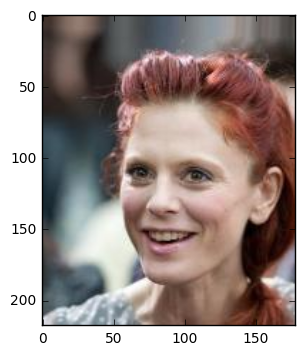

In [37]:
d = plt.imread('/home/senbo/Github/img_align_celeba/000002.jpg');
print(d);
plt.imshow(d);

In [38]:
from scipy import ndimage
def load_data(folder, min_num_images):
    """load images data from a folder"""
    img_files = os.listdir(folder);
    dataset = np.ndarray(shape=(len(img_files), img_height, img_width), dtype=np.float32);
    print(folder);
    for img_index, img in enumerate(img_files):
        img_file = os.path.join(folder,img);
        try:
            img_data = ndimage.imread(img_file).astype(float) ;
            if img_file.shape != (img_height, img_width):
                raise Exception('Unexpected image shape: %s' %str(img_file.shape));
        except IOError as e:
            print('Could not read: ', img_file, ':', e);
            
    num_img = img_index + 1;
    dataset = dataset[0:num_img, :, :];
    if min_num_images > num_img:
        raise Exception('Many fewer images than expected: %d < %d' % (num_img, min_num_images));
    
    print('Full dataset tensorflow: ', dataset.shape);
    print('Mean:', np.mean(dataset));
    print('Standard deviation: ', np.std(dataset));
    return dataset;

In [39]:
dataset = load_data(save_folder, num_img);

MemoryError: 

Because number of image is 20w+, so here out of menory...

<a id='s3'></a>
# 3. Tensorflow Basic

- Tensorflow return tensors by ops as numpy ndarray object 
ex: [2.] is a numpy 'ndarray' object

In [40]:
import tensorflow as tf
matrix1 = tf.constant([[3.,3.]]);
matrix2 = tf.constant([[2.],[2.]]);
print 'matrix1: ', matrix1;
print('matrix2: ', matrix2);
print(matrix1.get_shape());
print(matrix2.get_shape().as_list());

matrix1:  Tensor("Const:0", shape=(1, 2), dtype=float32)
('matrix2: ', <tf.Tensor 'Const_1:0' shape=(2, 1) dtype=float32>)
(1, 2)
[2, 1]


<a id='s3.1'></a>
## 3.1 Create a graph

In [41]:
g = tf.get_default_graph();
product = tf.matmul(matrix1, matrix2);
print(product);

Tensor("MatMul:0", shape=(1, 1), dtype=float32)


- display operations had been used in graph

In [42]:
print([op.name for op in g.get_operations()]);

[u'Const', u'Const_1', u'MatMul']


<a id='s3.2'></a>
## 3.2 Run a session
- Graph will not launch until a session object is created and run

In [43]:
sess = tf.Session();
result = sess.run(product);
print(result);
sess.close();

[[ 12.]]


automatically close session

In [44]:
with tf.Session() as sess:
    result = sess.run(product);
    print(result);

[[ 12.]]


<a id='s3.3'></a>
## 3.3 Interactive session
- Interactivesession must *close()* after using, just like tf.session() no with

In [45]:
sess = tf.InteractiveSession();
print(matrix1.eval());

[[ 3.  3.]]


In [46]:
x = tf.Variable([1.0, 2.0]);
x.initializer.run();
print(x);
print(x.eval());

[ 1.  2.]


In [47]:
a = tf.constant([3.0, 3.0]);
print(a.eval());

[ 3.  3.]


In [48]:
sub = tf.sub(x,a);
print(sub.eval());

[-2. -1.]


In [49]:
sess.close()

<a id='s3.4'></a>
# 3.4 Variables
- Variables must be initialized before launching a graph

In [50]:
sess = tf.InteractiveSession();
state = tf.Variable(0, name='counter');
state.initializer.run();
print(state.eval());
sess.close();

0


In [51]:
state = tf.Variable(0, name='counter');
one = tf.constant(1);
new_value = tf.add(state, one);
update = tf.assign(state, new_value);
init_op = tf.initialize_all_variables();

Launch the graph

In [52]:
with tf.Session() as sess:
    sess.run(init_op);
    print(sess.run(state));
    for _ in range(3):
        sess.run(update);
        print(sess.run(state));

0
1
2
3


<a id='s3.5'></a>
## 3.5 Placeholder

In [53]:
input1 = tf.placeholder(tf.float32);
input2 = tf.placeholder(tf.float32);
output = tf.mul(input1, input2);

In [54]:
with tf.Session() as sess:
    print(sess.run([output], feed_dict={input1:[7], input2:[2]}));

[array([ 14.], dtype=float32)]
